In [128]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [193]:
data = load_digits(as_frame=True)

df = data.frame
df

# This is the dataset of handwritten images which has been digitized 
# the pictures are 8*8, that is 64 pixles
# Each column represents a pixle in digits
# the 'target' column represents the actual digit displayed in the original picture
# we are going to use Decision Tree algorithm to perform a Multi-class Classification on this dataset

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0           0.0        0.0        0.0        0.0  ...        0.0        0.0   
1           0.0        0.0        0.0        0.0  ...        0.0        0.0   
2           0.0        0.0        0.0        0.0  ...        0.0        0.0   
3           0.0        0.0        0.0        8.0  ...        0.0        0.0   
4           0.0        0.0        0.0        0.0  ...        0.0        0.0   
...         ...        ...        ...        ...  ...        ...        ...   
1792        0.0        0.0        0.0        1.0  ...        0.0        0.0   
1793        1.0        0.0        0.0        0.0  ...        0.0        0.0   
1794        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1795        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1796        0.0        0.0        0.0        2.0  ...        0.0        0.0   

      pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
0           0.0        6.0       13.0       10.0        0.0        0.0   
1           0.0        0.0       11.0       16.0       10.0        0.0   
2           0.0        0.0        3.0       11.0       16.0        9.0   
3           0.0        7.0       13.0       13.0        9.0        0.0   
4           0.0        0.0        2.0       16.0        4.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        2.0       14.0       15.0        9.0        0.0   
1793        0.0        6.0       16.0       14.0        6.0        0.0   
1794        0.0        2.0        9.0       13.0        6.0        0.0   
1795        0.0        5.0       12.0       16.0       12.0        0.0   
1796        1.0        8.0       12.0       14.0       12.0        1.0   

      pixel_7_7  target  
0           0.0       0  
1           0.0       1  
2           0.0       2  
3           0.0       3  
4           0.0       4  
...         ...     ...  
1792        0.0       9  
1793        0.0       0  
1794        0.0       8  
1795        0.0       9  
1796        0.0       8  

[1797 rows x 65 columns]

In [208]:
data

{'data':       pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
 0           0.0        0.0        5.0       13.0        9.0        1.0   
 1           0.0        0.0        0.0       12.0       13.0        5.0   
 2           0.0        0.0        0.0        4.0       15.0       12.0   
 3           0.0        0.0        7.0       15.0       13.0        1.0   
 4           0.0        0.0        0.0        1.0       11.0        0.0   
 ...         ...        ...        ...        ...        ...        ...   
 1792        0.0        0.0        4.0       10.0       13.0        6.0   
 1793        0.0        0.0        6.0       16.0       13.0       11.0   
 1794        0.0        0.0        1.0       11.0       15.0        1.0   
 1795        0.0        0.0        2.0       10.0        7.0        0.0   
 1796        0.0        0.0       10.0       14.0        8.0        1.0   
 
       pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
 0        

In [243]:
data.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [19]:
fig = plt.figure(figsize=(1, 1))
ax = fig.add_axes([0, 0, 0.5, 0.5])

ax.matshow(data.images[1230])
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [87]:
# features values
x = df.iloc[:, :64].values

# target values
y = data.target.values

In [88]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [89]:
# Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

# model classifier
dt_model = DecisionTreeClassifier() # default hyper-parameters. Criterian = Gini impurity

# fit the model to the training data
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)

In [90]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [86]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.79      0.80      0.79        55
           2       0.81      0.90      0.85        49
           3       0.88      0.85      0.87        54
           4       0.83      0.82      0.83        61
           5       0.91      0.90      0.91        59
           6       0.90      0.96      0.93        46
           7       0.85      0.91      0.88        56
           8       0.80      0.66      0.72        59
           9       0.79      0.79      0.79        48

    accuracy                           0.85       540
   macro avg       0.85      0.85      0.85       540
weighted avg       0.85      0.85      0.85       540



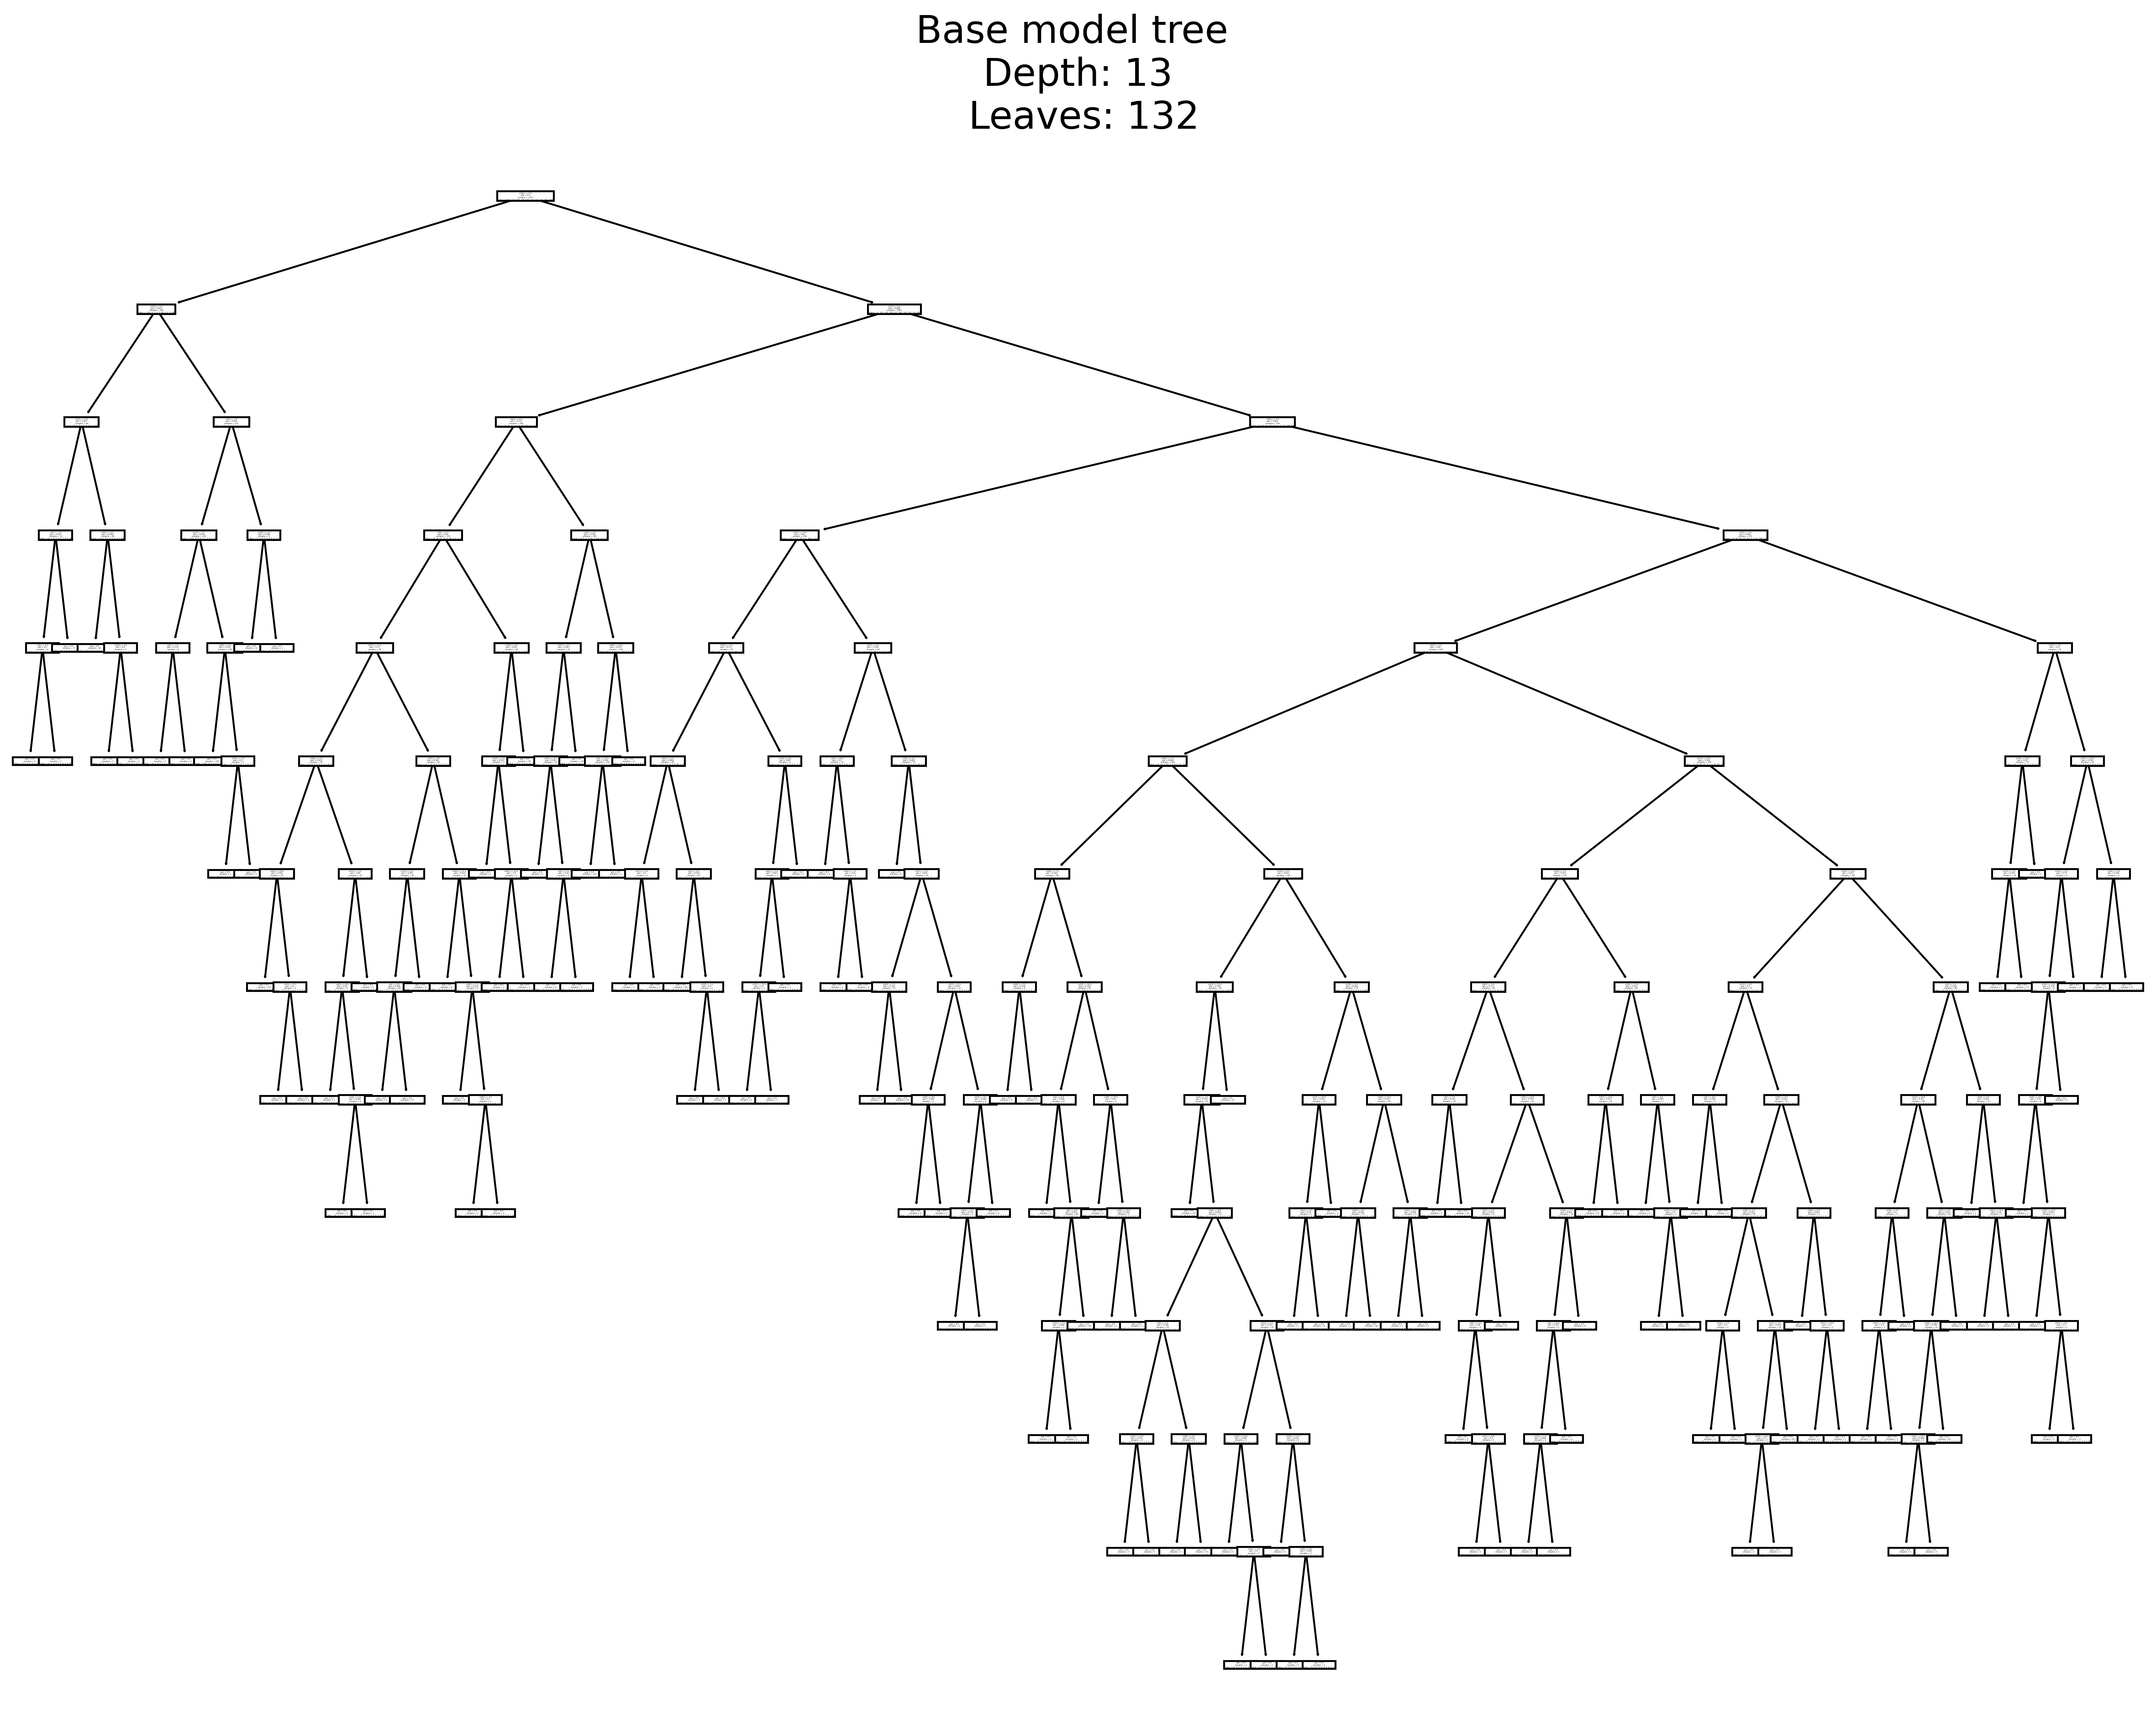

In [316]:
# Let's see the tree Visually
from sklearn.tree import plot_tree

# the depth of this tree?
dt_model.get_depth();

# the number of leafe nodes?
dt_model.get_n_leaves();

plt.figure(figsize=(20, 15), dpi=300)
plot_tree(dt_model);

plt.title(f'Base model tree \n Depth: {dt_model.get_depth()} \n Leaves: {dt_model.get_n_leaves()}', fontsize=20)

plt.show()

In [195]:
# Calculate the importance of every feature in the model prediction
# The sum of all the importance values equal to 1t
importance = dt_model.feature_importances_
im_df = pd.DataFrame(index=df.columns[:-1], columns=['Feature Relative Importance'], data=importance).sort_values(by='Feature Relative Importance')
im_df

Feature Relative Importance
pixel_0_0                     0.000000
pixel_7_1                     0.000000
pixel_7_0                     0.000000
pixel_6_7                     0.000000
pixel_6_1                     0.000000
...                                ...
pixel_3_2                     0.067844
pixel_4_4                     0.079207
pixel_2_5                     0.081925
pixel_5_2                     0.087410
pixel_4_1                     0.111449

[64 rows x 1 columns]

In [196]:
# count the number of pixels havng zero importance in the prediction process
im_df[im_df['Feature Relative Importance'] <= 0].count()

Feature Relative Importance    21
dtype: int64

In [197]:
# Bar plot to see which pixles are so important visually
fig = plt.figure(figsize=(10, 8), dpi=100)
sb.barplot(x=df.columns[:-1], y=importance)
plt.show()

In [220]:
# it's observed from the bar plot that only a few pixles have a high importance 
# Those that have an importance higher than 0.02 are a little more eye-catching in the plot
# so let's see how the model perform if we gave it these pixles only.
# let's see how many pixles have the importance of greater than 0.02
im_df[im_df['Feature Relative Importance'] >= 0.02].count() # there are 14 of them

Feature Relative Importance    14
dtype: int64

In [198]:
# feature reduction: reduce the number of features limited to those with importance greater than 0.02 
# there are 14 of them with importance greater than 0.02
# we want to build the model again with these features only to see how the performance changes! 
x_reduced = df[im_df[im_df['Feature Relative Importance'] >= 0.02].index].values

In [179]:
# Split the new reduced dataset into train and test sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x_reduced, y, test_size=0.3, random_state=101)

In [185]:
# build the model
dt_reduced = DecisionTreeClassifier() # using default hyperparameters. Gini impurity

# fit the model
dt_reduced.fit(x1_train, y1_train)

# Prediction
y_pred_reduced = dt_reduced.predict(x1_test)

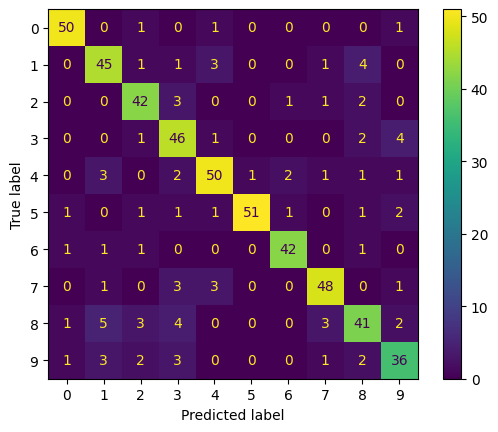

In [286]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y1_test, y_pred_reduced);

In [189]:
# Classification report
print(classification_report(y1_test, y_pred_reduced))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        53
           1       0.78      0.82      0.80        55
           2       0.81      0.86      0.83        49
           3       0.73      0.85      0.79        54
           4       0.85      0.82      0.83        61
           5       0.98      0.86      0.92        59
           6       0.91      0.91      0.91        46
           7       0.87      0.86      0.86        56
           8       0.76      0.69      0.73        59
           9       0.77      0.75      0.76        48

    accuracy                           0.84       540
   macro avg       0.84      0.84      0.84       540
weighted avg       0.84      0.84      0.84       540



In [192]:
# as you can see above, the accuracy didn't change so much.
# and we get the accuracy of 84 percent only having 14 pixels for each image instead of 64 pixles.

In [317]:
# see the tree for the reduced model

# the depth of this tree?
dt_reduced.get_depth();

# the number of leafe nodes?
dt_reduced.get_n_leaves();

plt.figure(figsize=(20, 15), dpi=300)
plot_tree(dt_reduced);

plt.title(f'Base model tree \n Depth: {dt_reduced.get_depth()} \n Leaves: {dt_reduced.get_n_leaves()}', fontsize=20)

plt.show()

In [281]:
# Now let's Explore how the base model with all pixles included, changes with different hyperparameters

def report_model(model):
    
    # fit the model to the data
    model.fit(x_train, y_train)

    # Prediction
    model_pred = model.predict(x_test)

    # classification report
    print('Classification Report: \n\n', classification_report(y_test, model_pred))

    # Show the Confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, model_pred)
    plt.title('Confusion matrix', fontsize=13)
  

    # Show the tree
    plt.figure(figsize=(20, 15), dpi=300)
    plot_tree(model);
    plt.title(f"Tree with depth equal to {model.get_depth()} \n the number of leaf nodes: {model.get_n_leaves()}", fontsize=20)

# Hyperparameter: Maximum Depth of the Tree

Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.75      0.78      0.77        55
           2       0.77      0.90      0.83        49
           3       0.89      0.89      0.89        54
           4       0.83      0.82      0.83        61
           5       0.96      0.86      0.91        59
           6       0.90      0.96      0.93        46
           7       0.78      0.89      0.83        56
           8       0.81      0.71      0.76        59
           9       0.88      0.75      0.81        48

    accuracy                           0.85       540
   macro avg       0.85      0.85      0.85       540
weighted avg       0.85      0.85      0.85       540



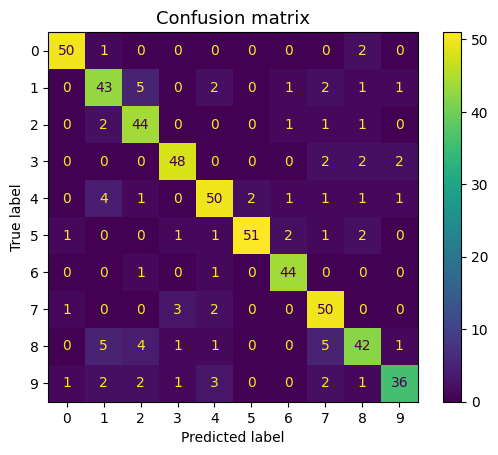

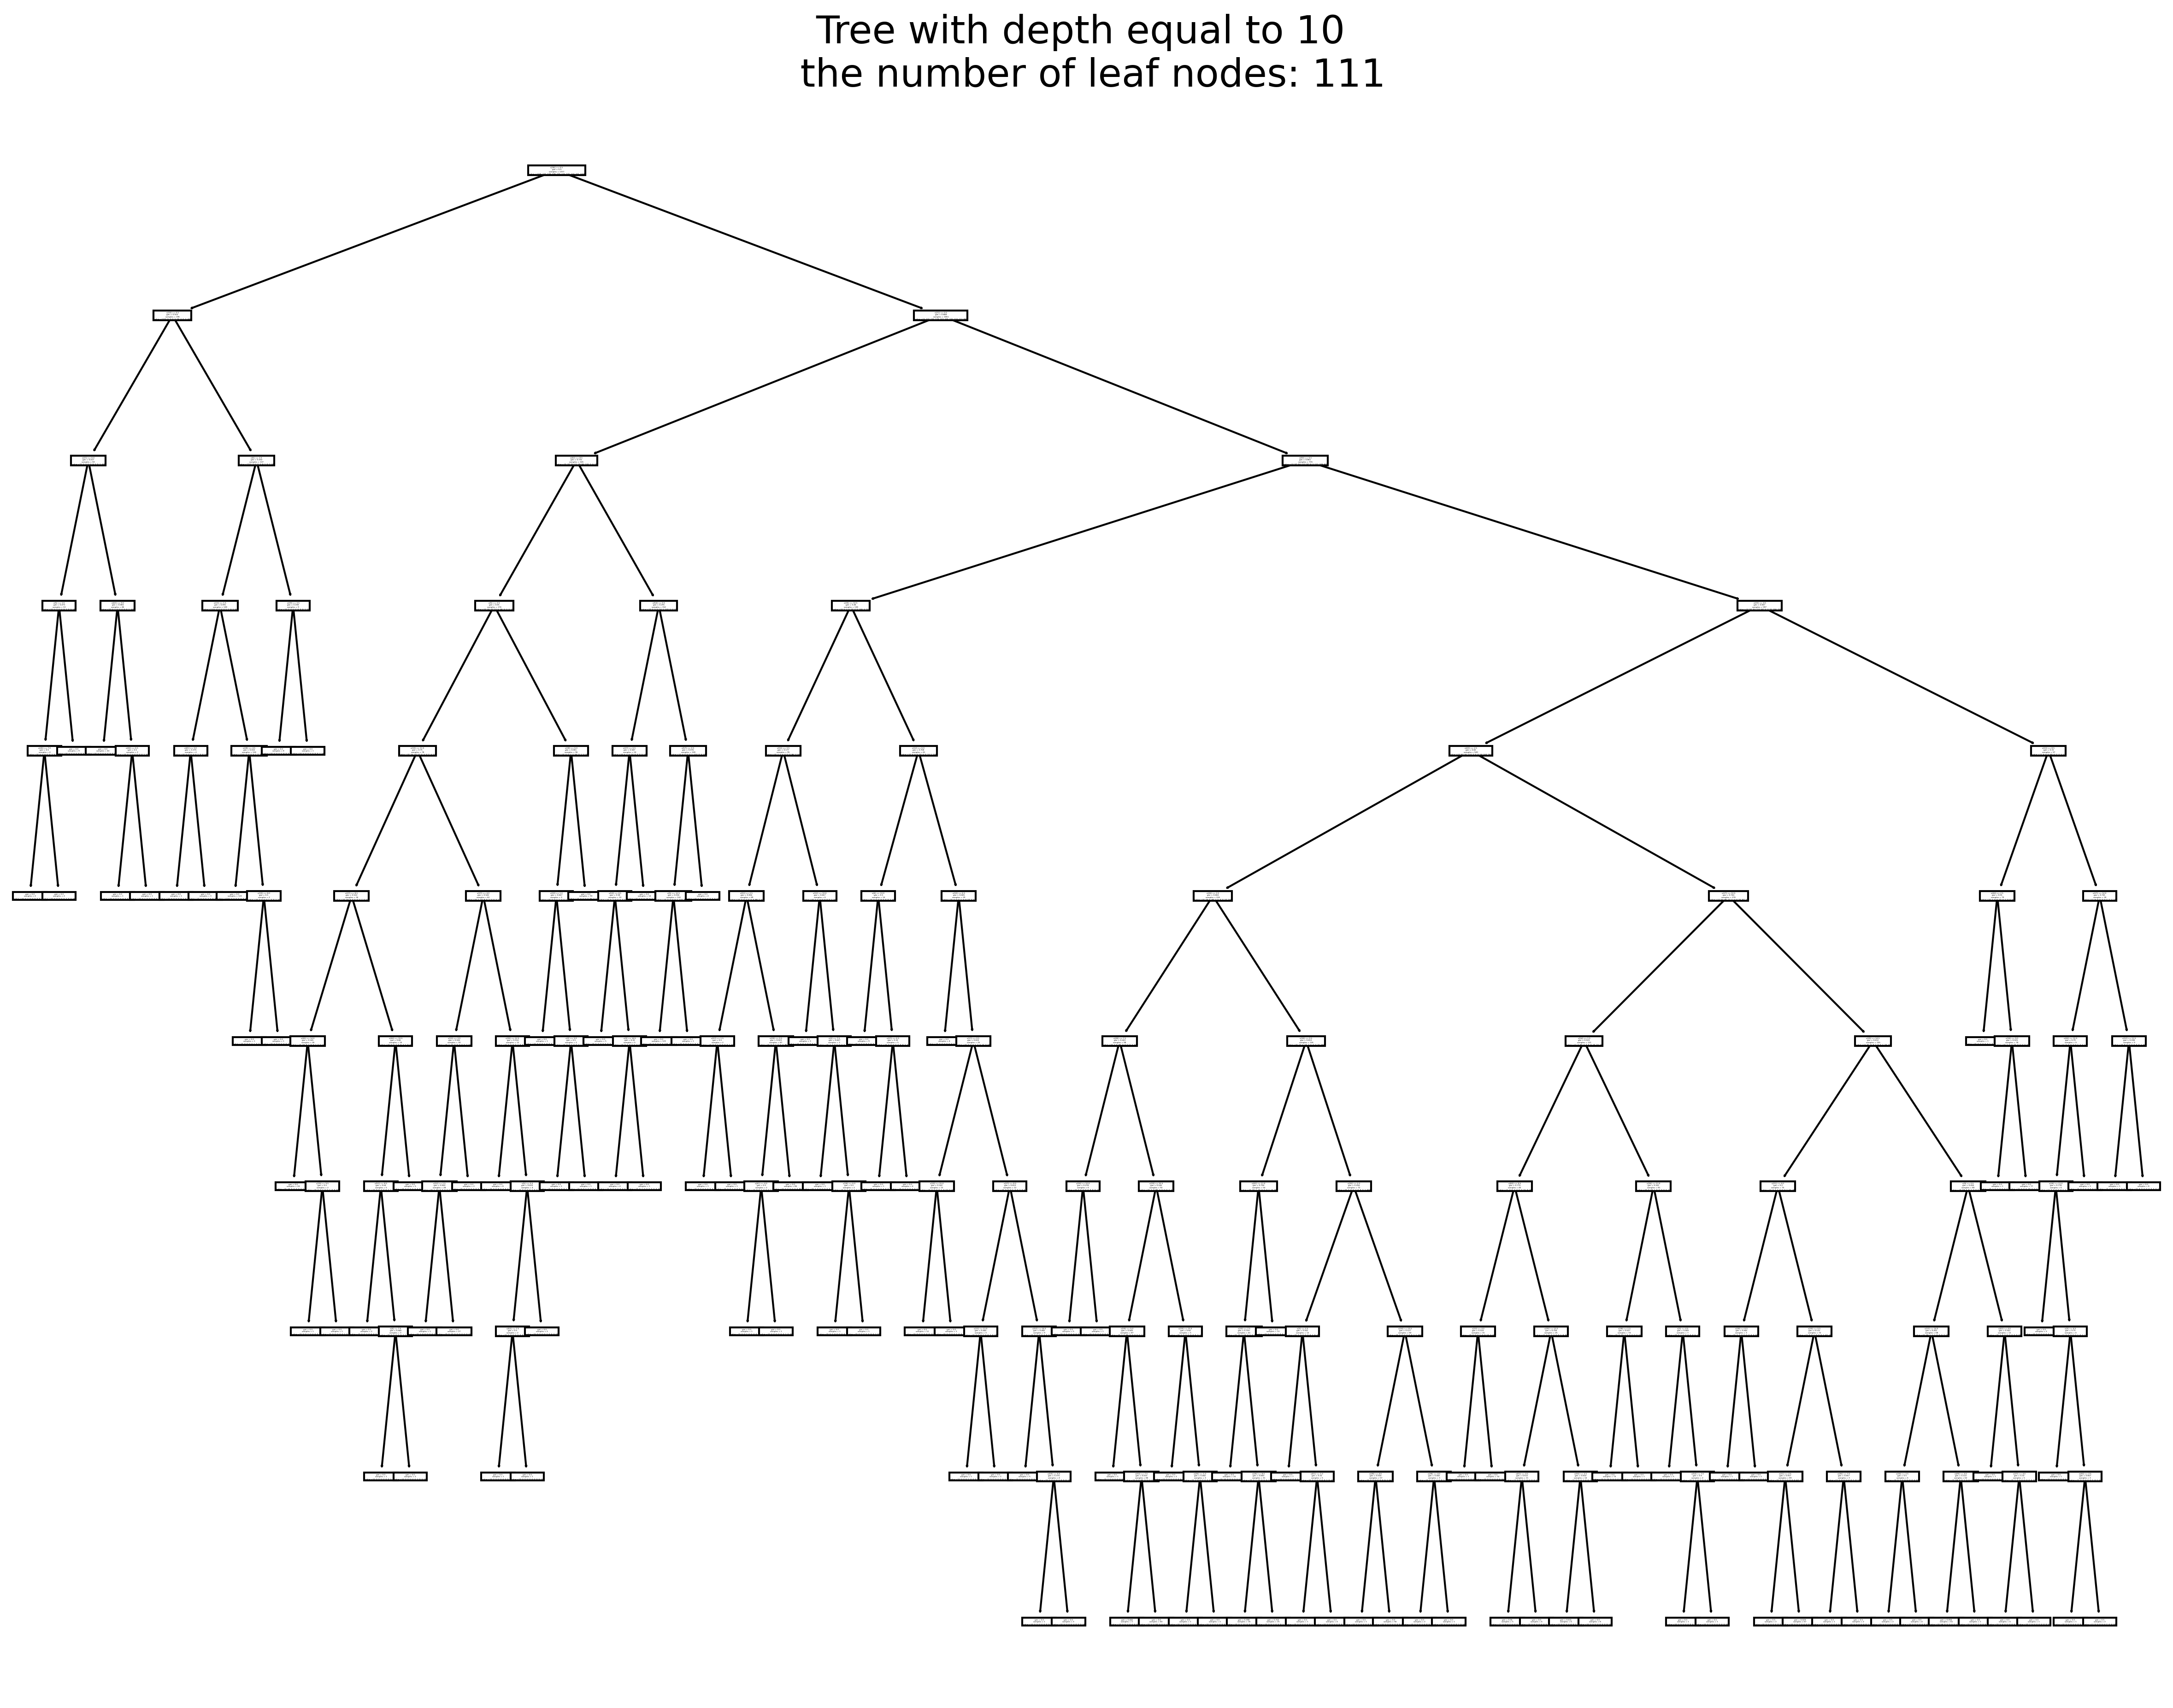

In [282]:
# hyperparameter: Max depth of the tree. actually we wana prune the tree to have less depth
# our base model had a depth of 13, so lets try different depth
model1 = DecisionTreeClassifier(max_depth=10)
report_model(model1)

# Hyperparameter: Maximum Leaf Nodes

Classification Report: 

               precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.78      0.71      0.74        55
           2       0.72      0.90      0.80        49
           3       0.84      0.87      0.85        54
           4       0.77      0.84      0.80        61
           5       0.96      0.86      0.91        59
           6       0.91      0.91      0.91        46
           7       0.83      0.88      0.85        56
           8       0.77      0.73      0.75        59
           9       0.86      0.75      0.80        48

    accuracy                           0.84       540
   macro avg       0.84      0.84      0.84       540
weighted avg       0.84      0.84      0.84       540



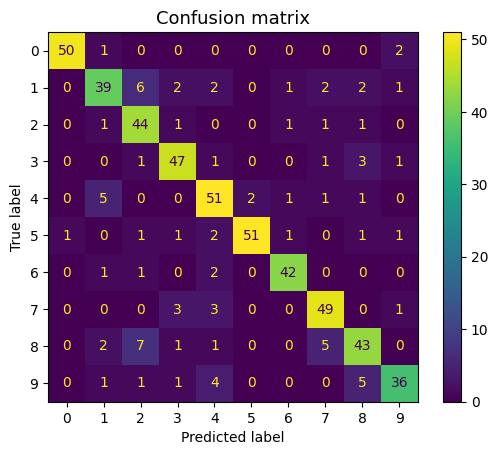

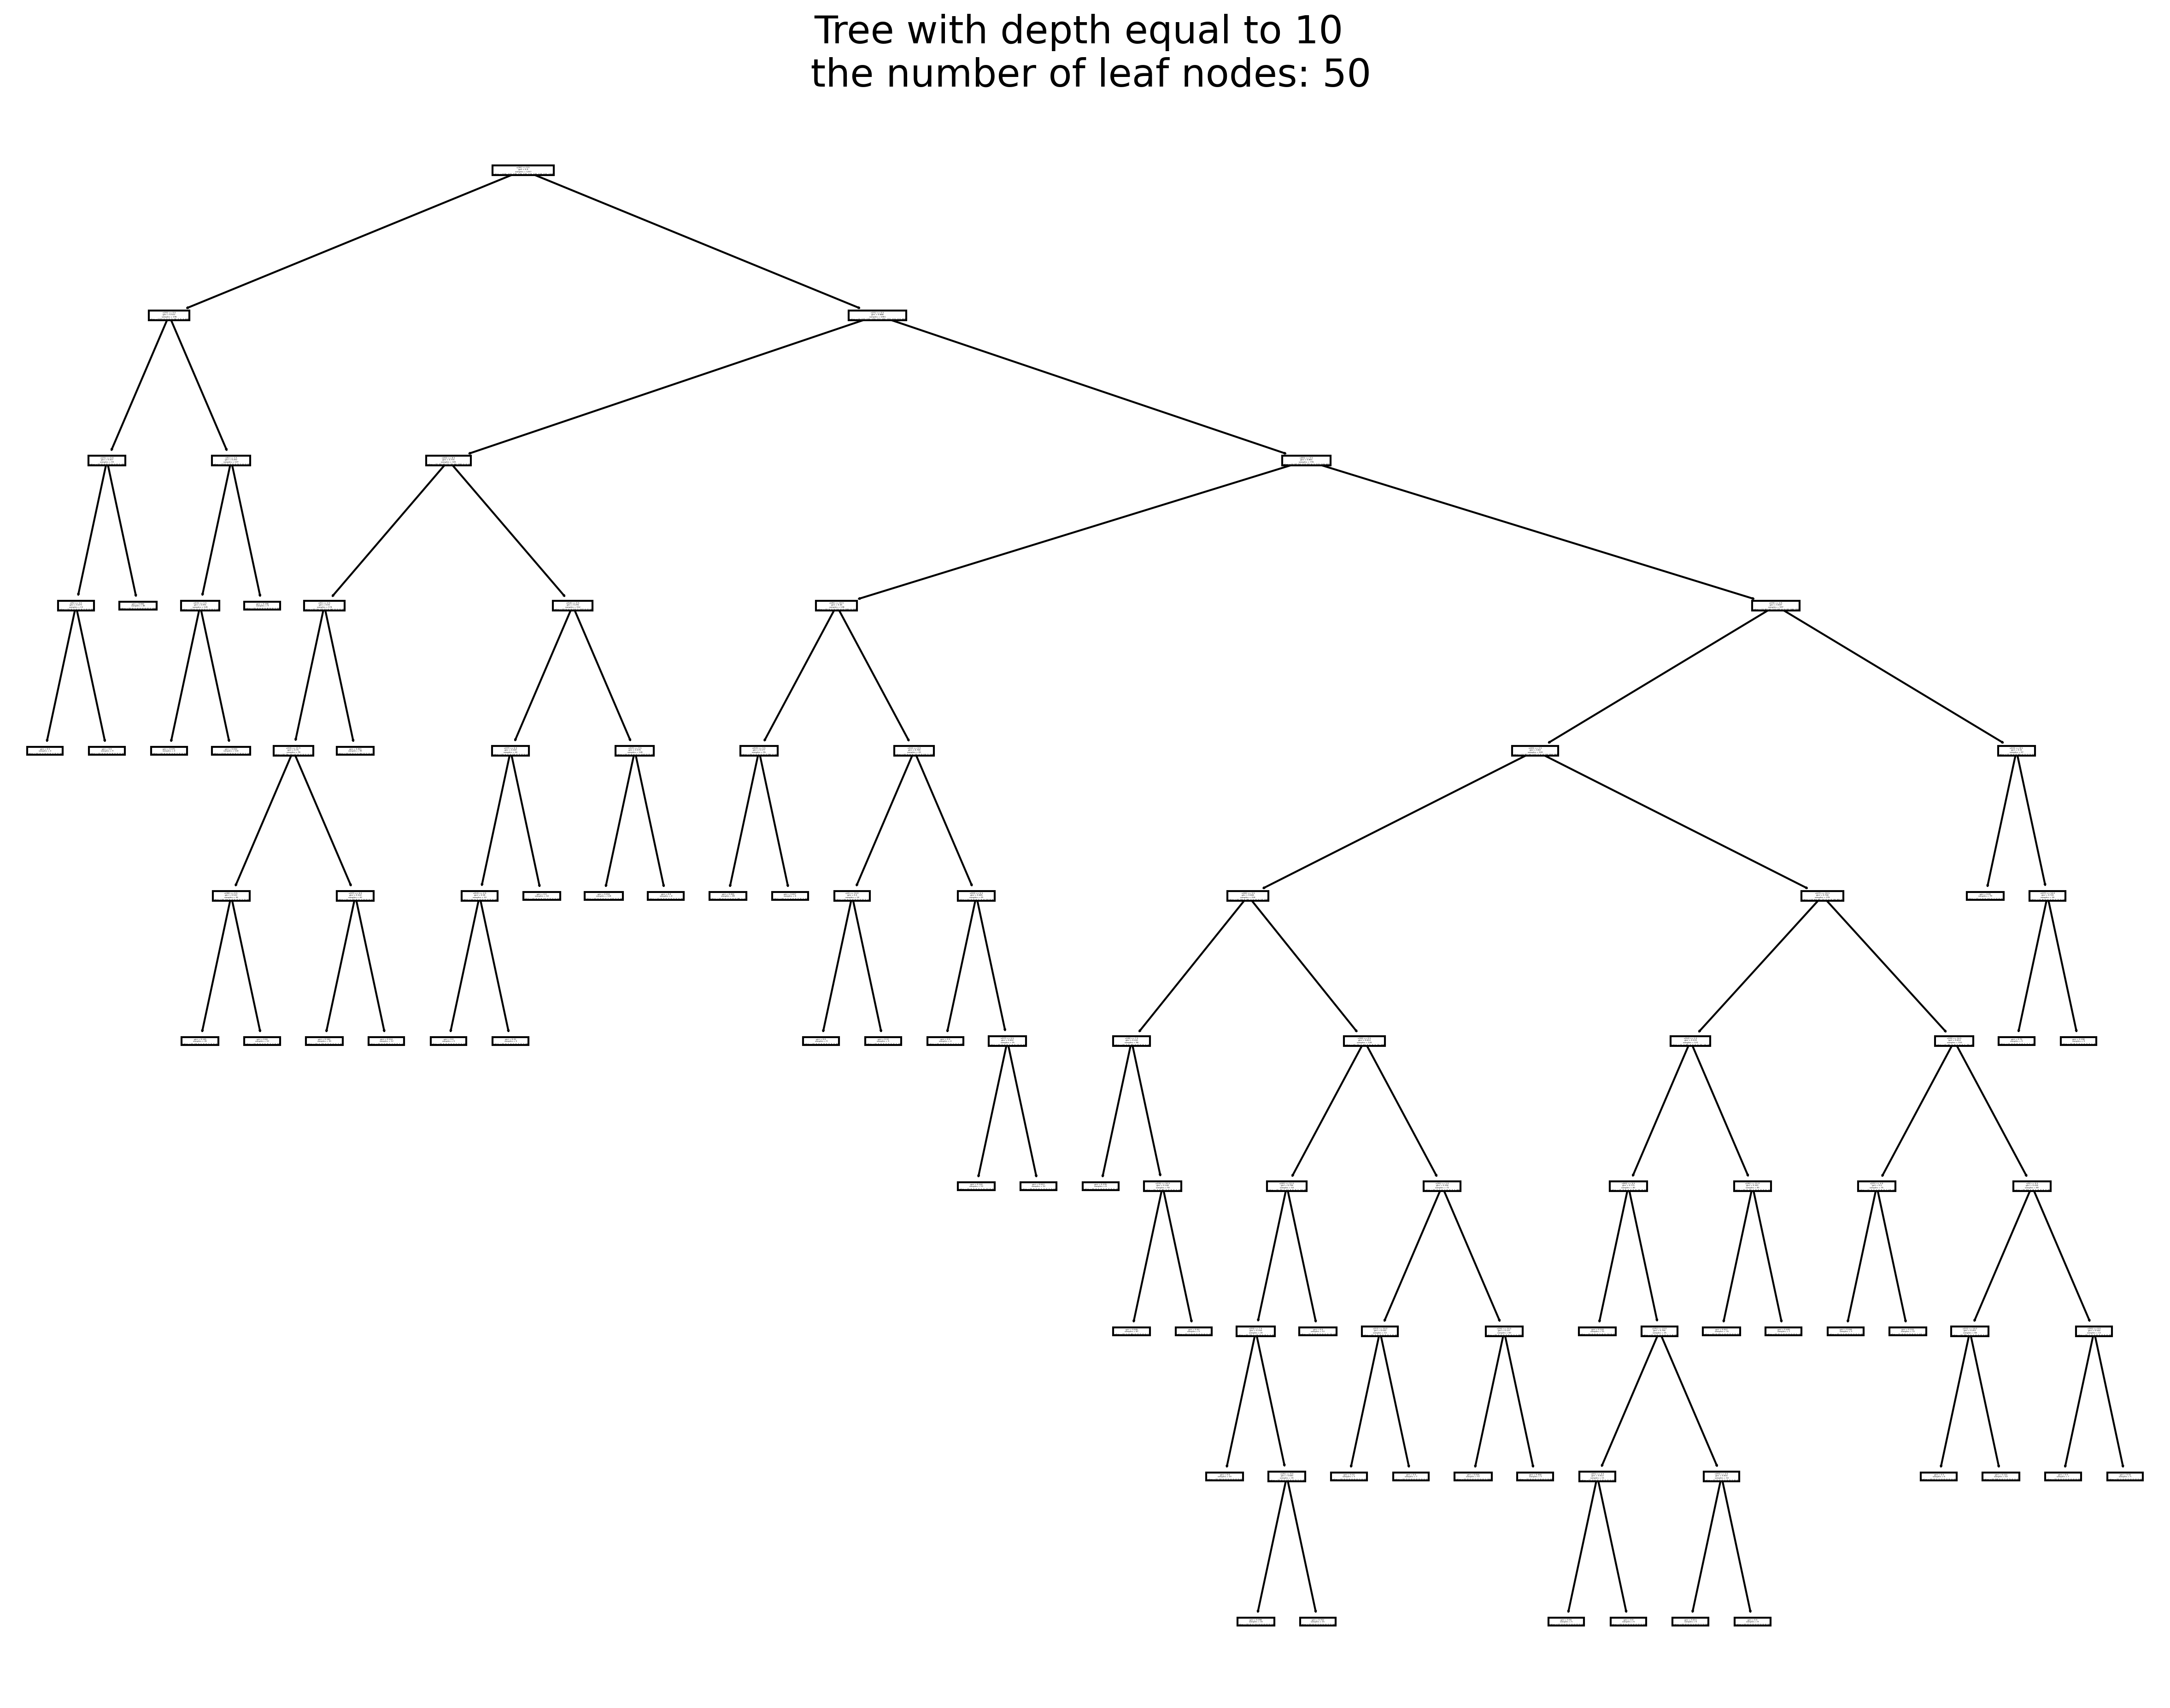

In [283]:
# hyperparameter: Maximum leaf nodes
model2 = DecisionTreeClassifier(max_leaf_nodes=50)
report_model(model2)

# Hyperparameter: Criterion

Classification Report: 

               precision    recall  f1-score   support

           0       0.93      0.98      0.95        53
           1       0.75      0.89      0.82        55
           2       0.88      0.92      0.90        49
           3       0.78      0.87      0.82        54
           4       0.85      0.85      0.85        61
           5       0.90      0.75      0.81        59
           6       0.85      0.96      0.90        46
           7       0.86      0.75      0.80        56
           8       0.68      0.69      0.69        59
           9       0.92      0.71      0.80        48

    accuracy                           0.83       540
   macro avg       0.84      0.84      0.83       540
weighted avg       0.84      0.83      0.83       540



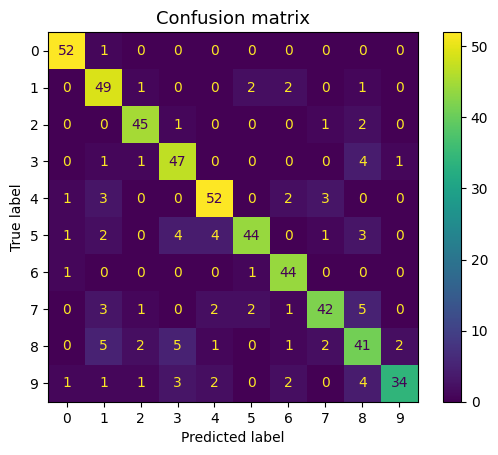

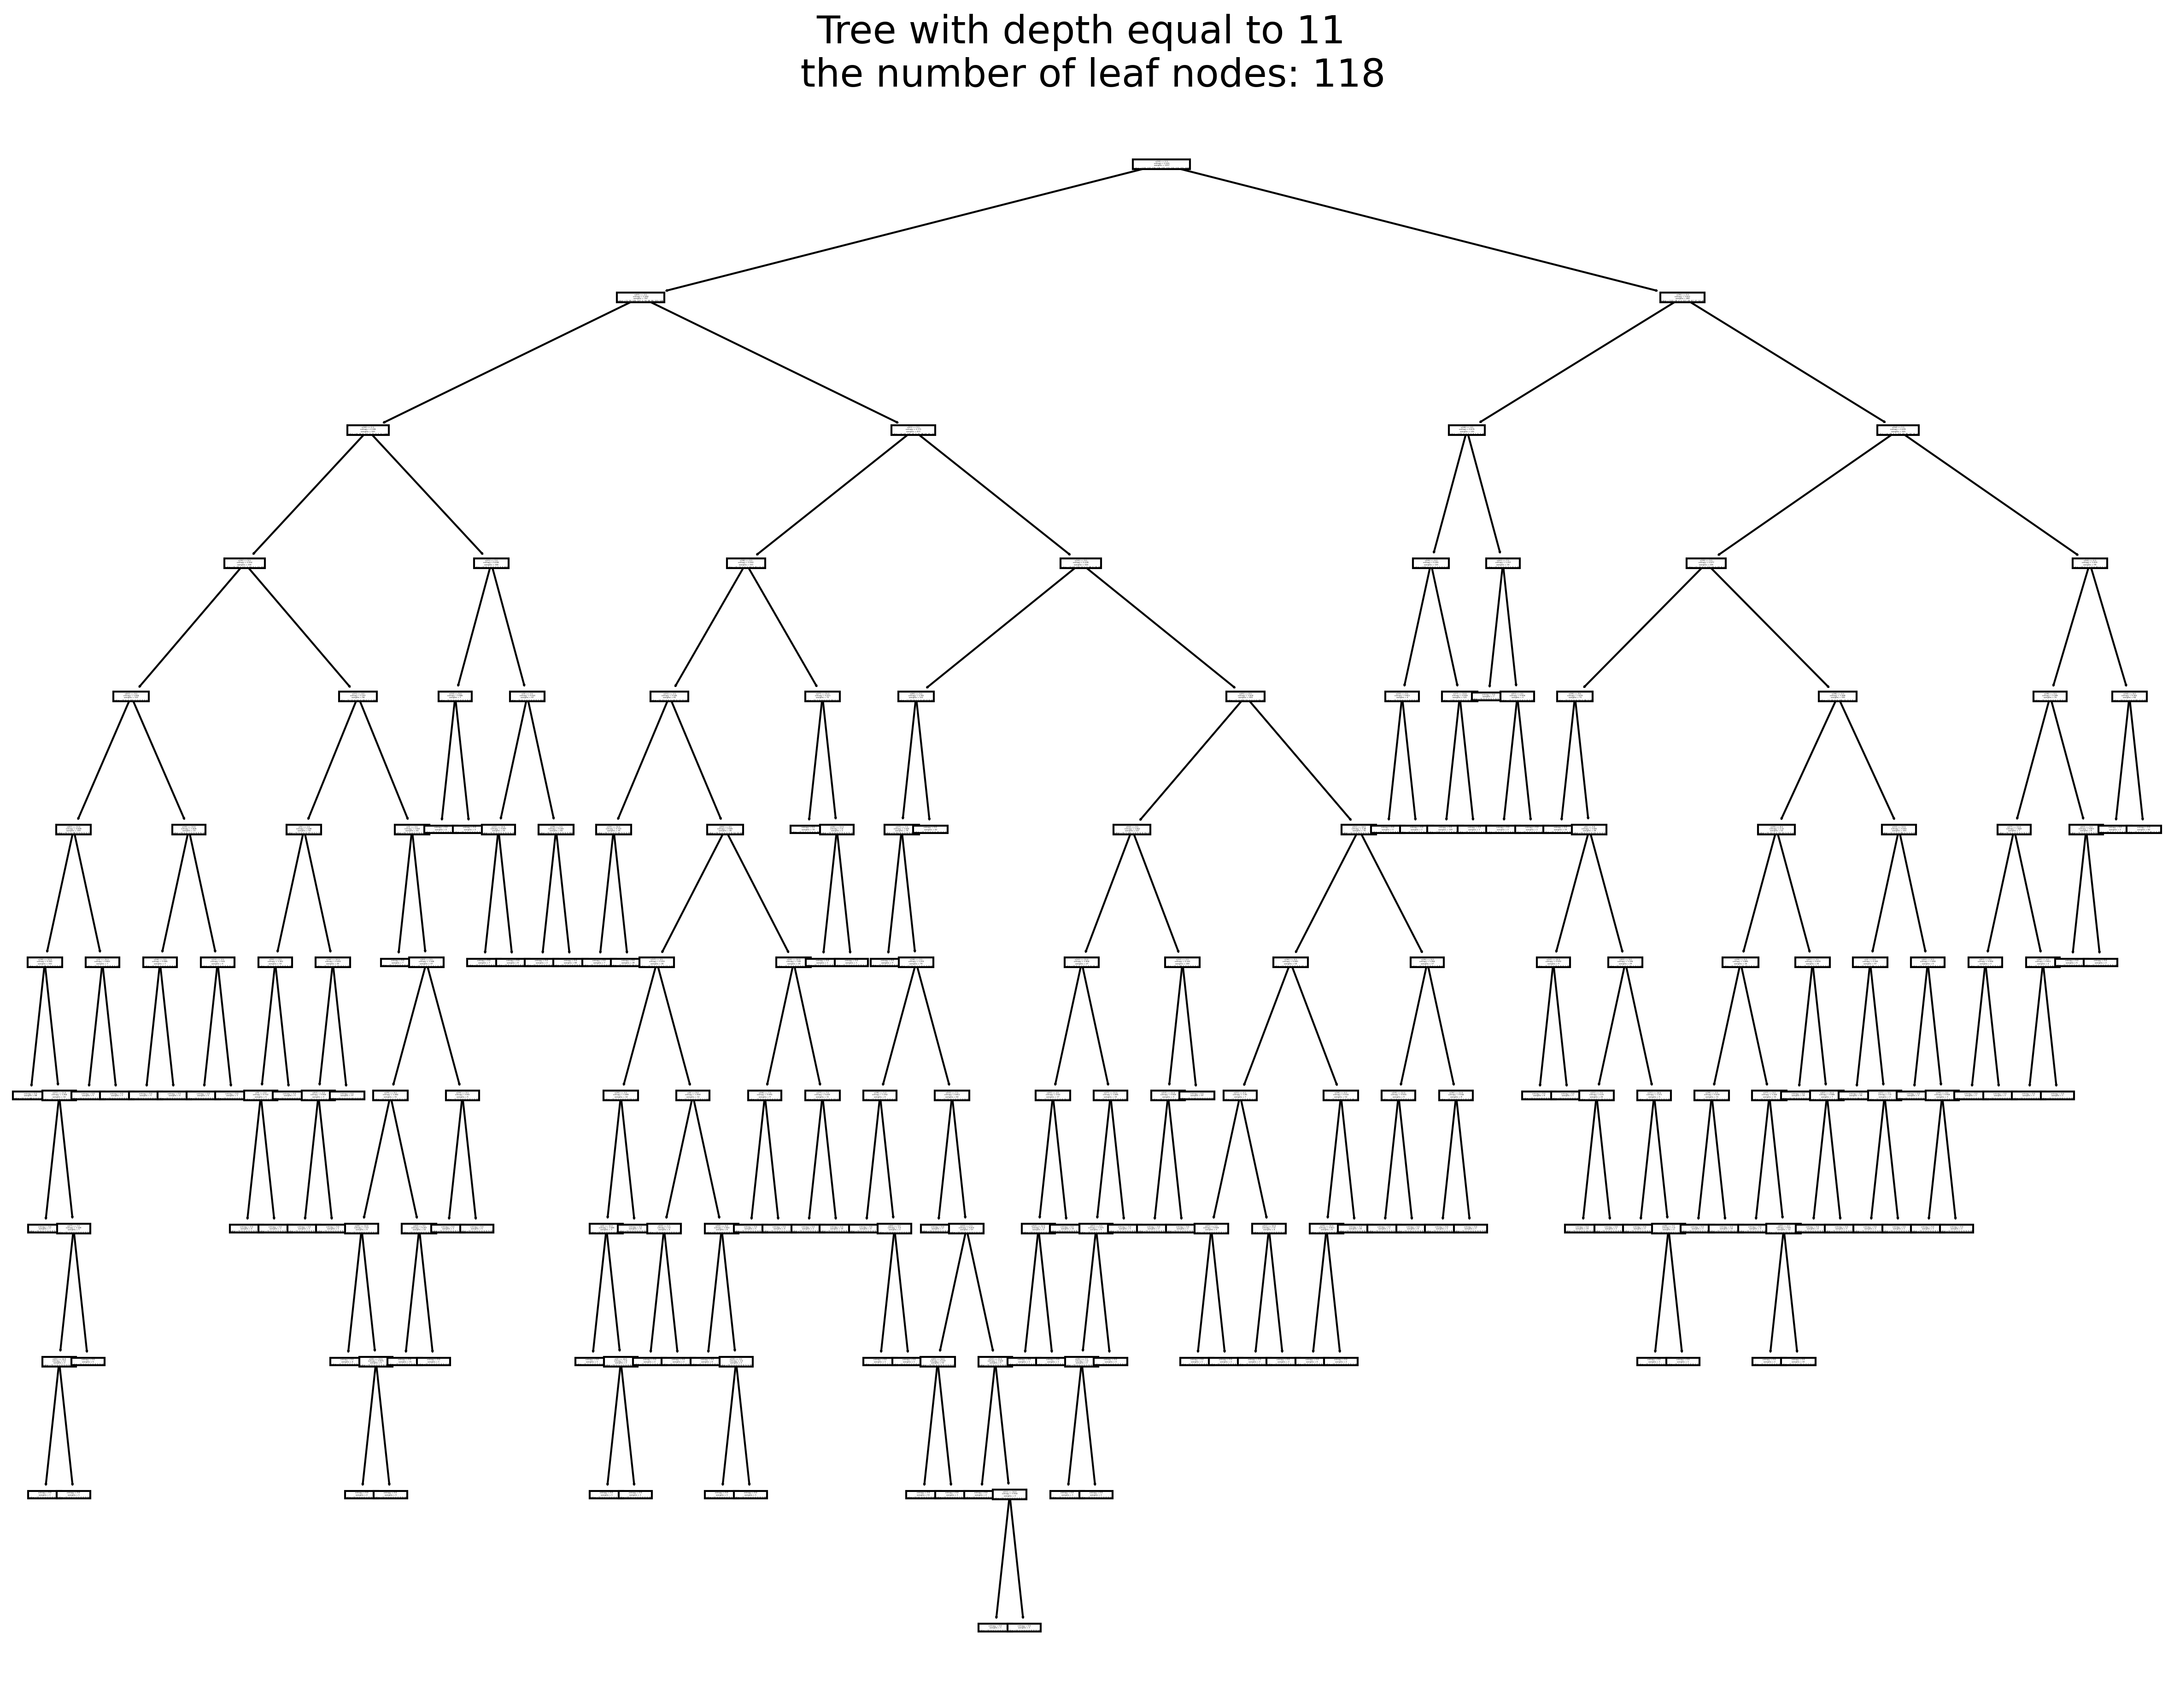

In [285]:
# the base model was using Gini impurity 
# let's use entropy
model3 = DecisionTreeClassifier(criterion='entropy')
report_model(model3)

# Hyperparameter: Mean Impurity Decrease

In [305]:
# lets see how the gini scores were in the base model's tree.

# each leaf's gini score
dt_model.tree_.impurity;

pd.DataFrame(columns=['Gini scores'], data=dt_model.tree_.impurity).describe().transpose()

count      mean       std  min  25%  50%  75%       max
Gini scores  263.0  0.218943  0.277483  0.0  0.0  0.0  0.5  0.899806

Classification Report: 

               precision    recall  f1-score   support

           0       0.93      0.94      0.93        53
           1       0.65      0.73      0.68        55
           2       0.86      0.78      0.82        49
           3       0.72      0.89      0.79        54
           4       0.90      0.59      0.71        61
           5       0.91      0.88      0.90        59
           6       0.95      0.87      0.91        46
           7       0.66      0.88      0.75        56
           8       0.67      0.75      0.70        59
           9       0.85      0.60      0.71        48

    accuracy                           0.79       540
   macro avg       0.81      0.79      0.79       540
weighted avg       0.81      0.79      0.79       540



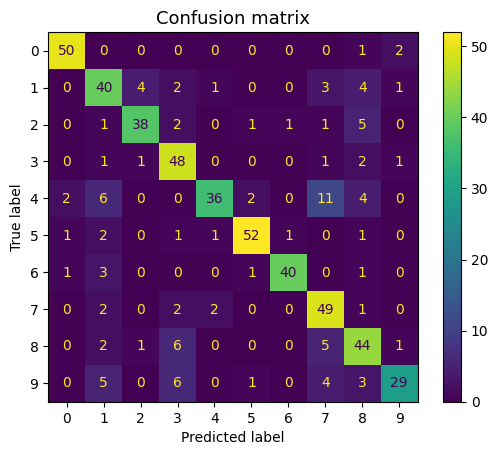

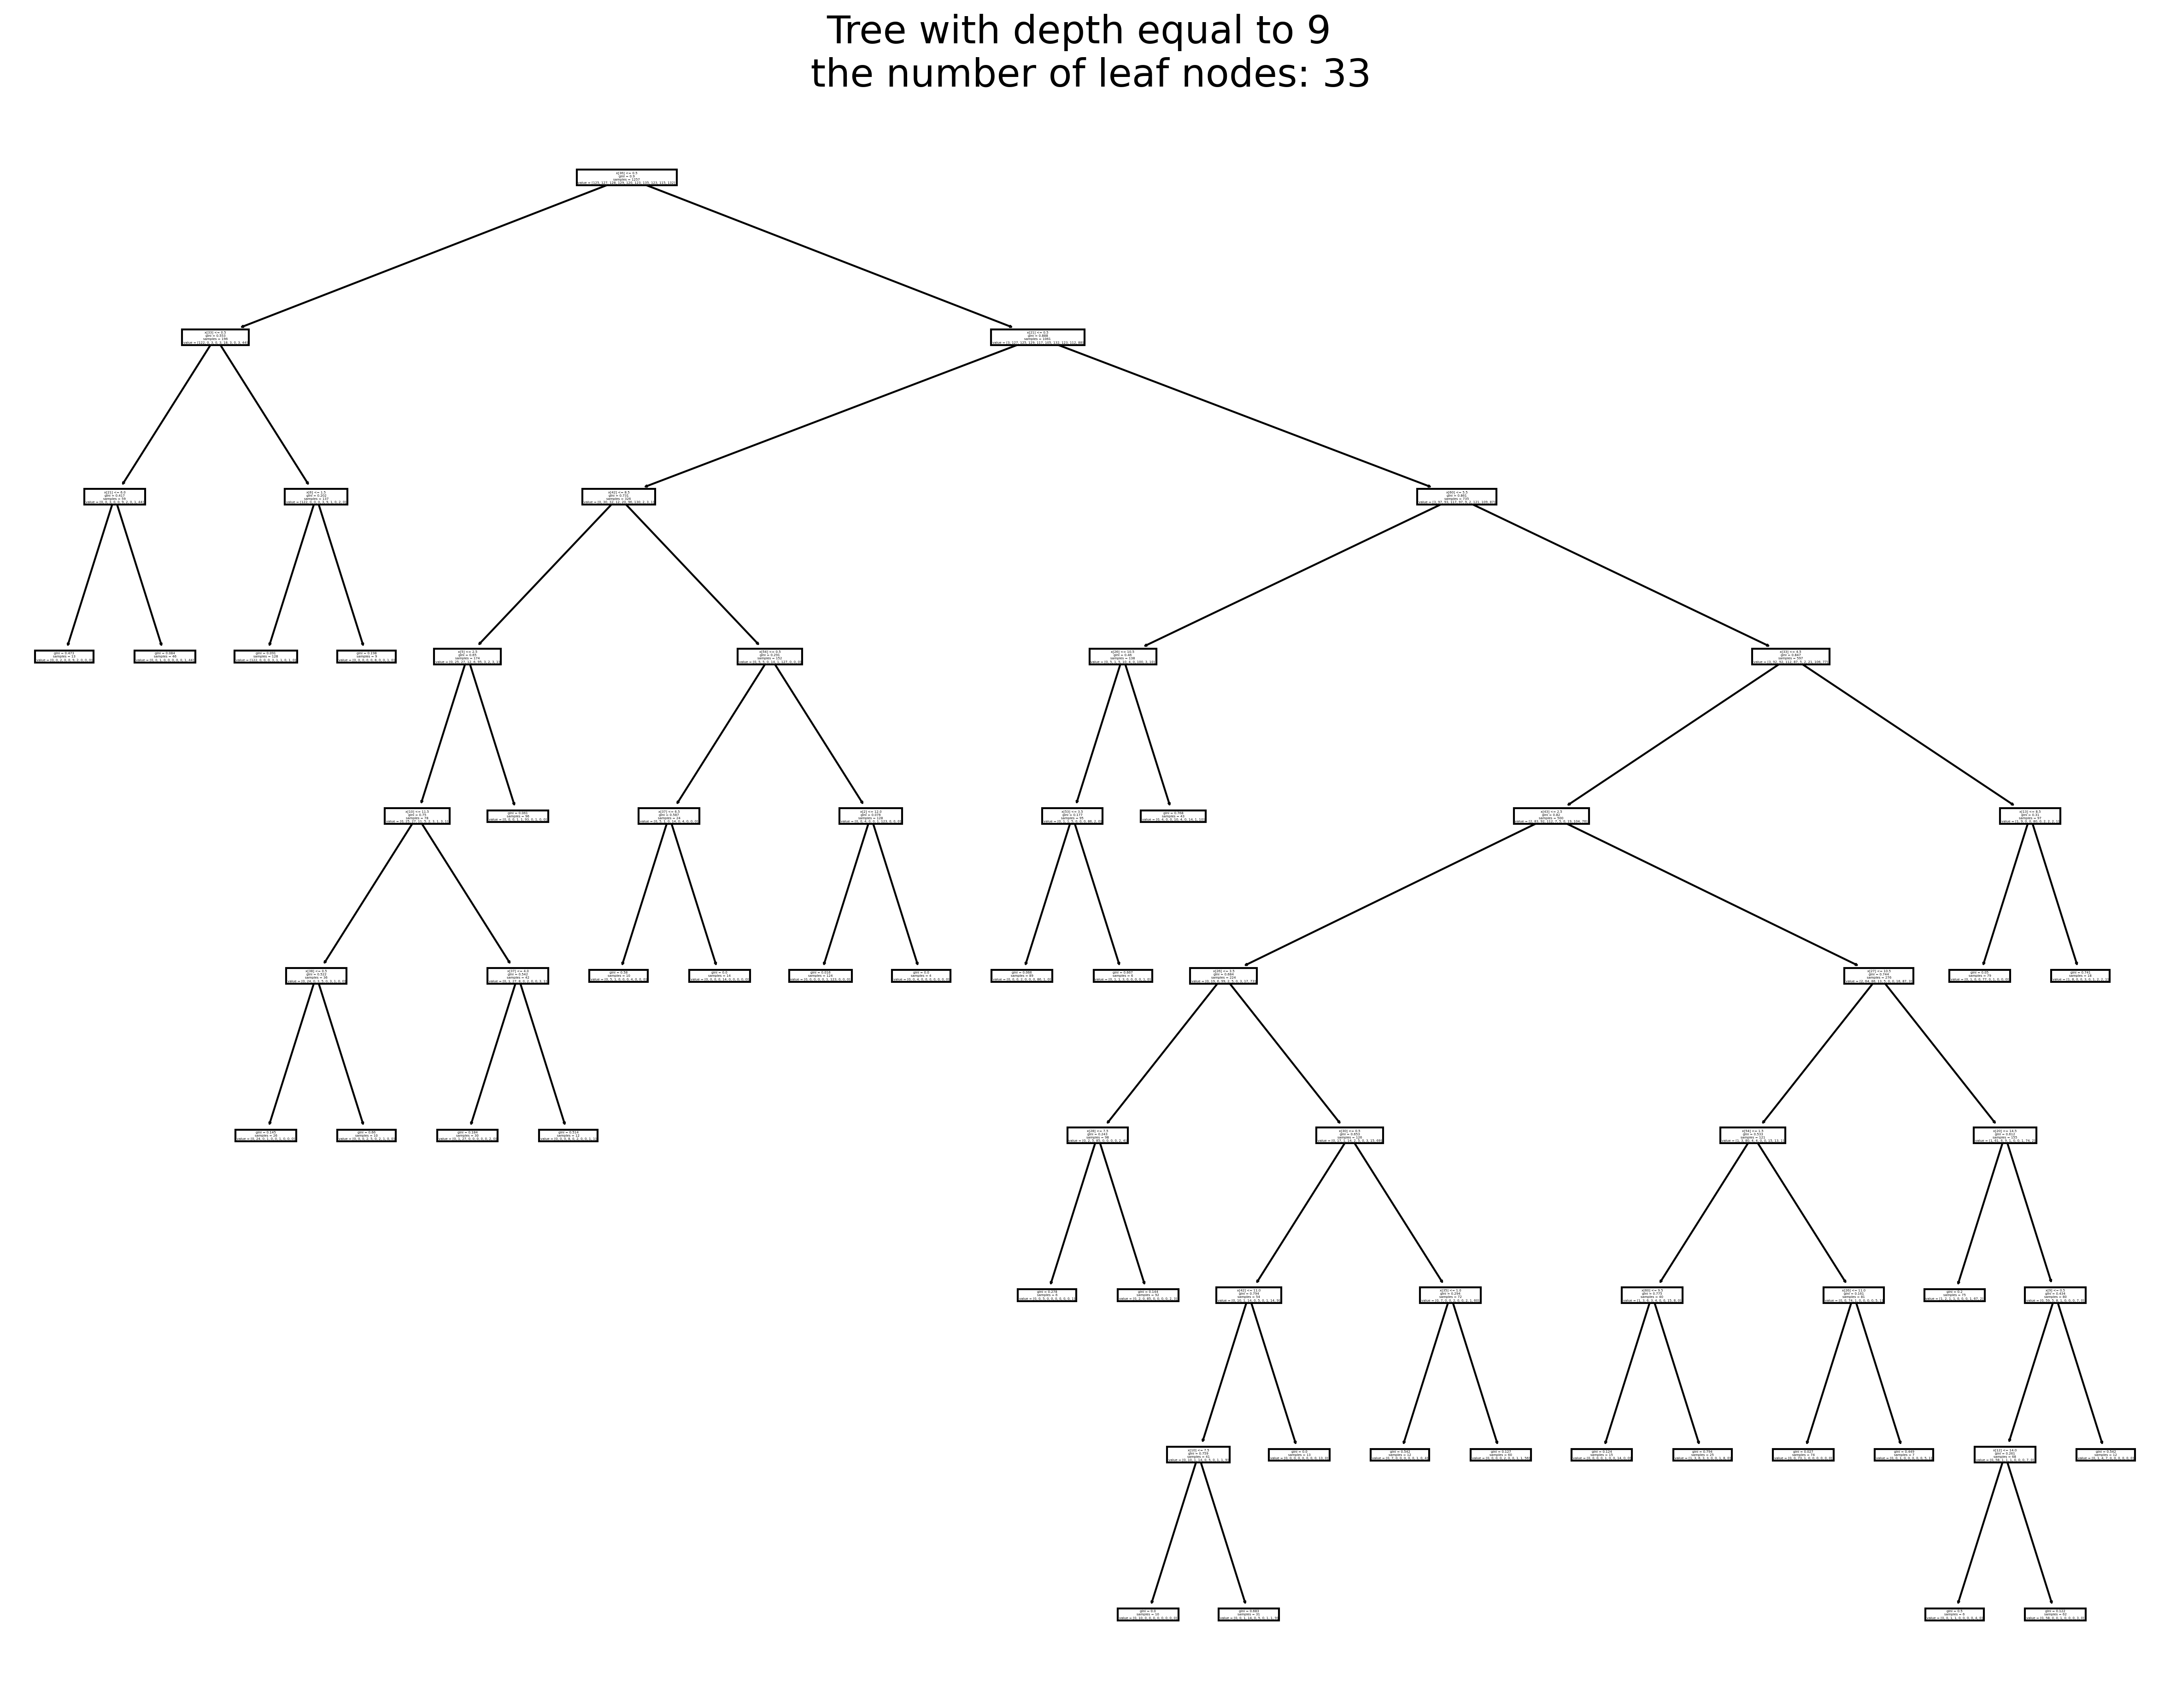

In [341]:
# let's set the minimum gini decrease to this mean value
model4 = DecisionTreeClassifier(min_impurity_decrease=0.00499)
report_model(model4)

# try values: 0.00299, 0.00399, 0.00499, 0.00599